In [1]:
# import necessary lbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read preprocessed data

data = pd.read_csv('processed.csv.gz')

In [3]:
data.head()

,Unnamed: 0,index,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benifit_score,sideeffect_score,comment_score,condition_label,DrugName_label,SideEffect_overall,vaderSentiment_SE,vaderSentiment_CS,vaderSentiment_BS
0,0,0,enalapril,4,4,1,management of congestive heart failure,slow progress left ventricular dysfunct overt ...,cough hypotens proteinuria impot renal failur ...,monitor blood pressur weight ass resolut fluid,0.4215,-0.8176,-0.5423,999,176,1,0,0,2
1,1,1,ortho-tri-cyclen,1,4,3,birth prevention,although type birth control con pros help cram...,heavi cycl cramp hot flash fatigu long last cy...,hate birth control suggest anyon,0.4767,0.3818,-0.5719,291,344,1,1,0,2
2,2,2,ponstel,10,4,0,menstrual cramps,use cramp bad leav ball bed least 2 day ponste...,heavier bleed clot normal,took 2 pill onset menstrual cramp everi 8 12 h...,-0.8225,0.0000,-0.7717,1024,373,0,0,0,0
3,3,3,prilosec,3,1,1,acid reflux,acid reflux went away month day drug heartburn...,constip dri mouth mild dizzi go away medic sto...,given prilosec prescript dose 45mg per day med...,-0.5267,-0.2960,0.0000,16,382,1,0,1,0
4,4,4,lyrica,2,1,3,fibromyalgia,think lyrica start help pain side effect sever...,felt extrem drug dopey drive med extrem ankl f...,see,-0.1531,0.0000,0.0000,623,279,1,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4132 non-null   int64  
 1   index               4132 non-null   int64  
 2   DrugName            4132 non-null   object 
 3   rating              4132 non-null   int64  
 4   effectiveness       4132 non-null   int64  
 5   sideEffects         4132 non-null   int64  
 6   condition           4132 non-null   object 
 7   benefitsReview      4130 non-null   object 
 8   sideEffectsReview   4127 non-null   object 
 9   commentsReview      4116 non-null   object 
 10  benifit_score       4132 non-null   float64
 11  sideeffect_score    4132 non-null   float64
 12  comment_score       4132 non-null   float64
 13  condition_label     4132 non-null   int64  
 14  DrugName_label      4132 non-null   int64  
 15  SideEffect_overall  4132 non-null   int64  
 16  vaderS

In [5]:
# Lets do side effect analysis using side effects and sideEffects reviews

In [6]:
data['vaderSentiment']= data['sideeffect_score'].map(lambda x:int(1)if x>0 else int(0))

In [7]:
data.head()

,Unnamed: 0,index,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benifit_score,sideeffect_score,comment_score,condition_label,DrugName_label,SideEffect_overall,vaderSentiment
0,0,0,enalapril,4,4,1,management of congestive heart failure,slow progress left ventricular dysfunct overt ...,cough hypotens proteinuria impot renal failur ...,monitor blood pressur weight ass resolut fluid,0.4215,-0.8176,-0.5423,999,176,1,0
1,1,1,ortho-tri-cyclen,1,4,3,birth prevention,although type birth control con pros help cram...,heavi cycl cramp hot flash fatigu long last cy...,hate birth control would not suggest anyon,0.4767,0.3818,-0.5719,291,344,1,1
2,2,2,ponstel,10,4,0,menstrual cramps,use cramp bad would leav ball bed least 2 day ...,heavier bleed clot normal,took 2 pill onset menstrual cramp everi 8 12 h...,-0.8225,0.0000,-0.7717,1024,373,0,0
3,3,3,prilosec,3,1,1,acid reflux,acid reflux went away month day drug heartburn...,constip dri mouth mild dizzi would go away med...,given prilosec prescript dose 45mg per day med...,-0.5267,-0.2960,0.0000,16,382,1,0
4,4,4,lyrica,2,1,3,fibromyalgia,think lyrica start help pain side effect sever...,felt extrem drug dopey could not drive med als...,see,-0.1531,0.0000,0.0000,623,279,1,0


In [8]:
data['vaderSentiment'].value_counts()

0    3360
1     772
Name: vaderSentiment, dtype: int64

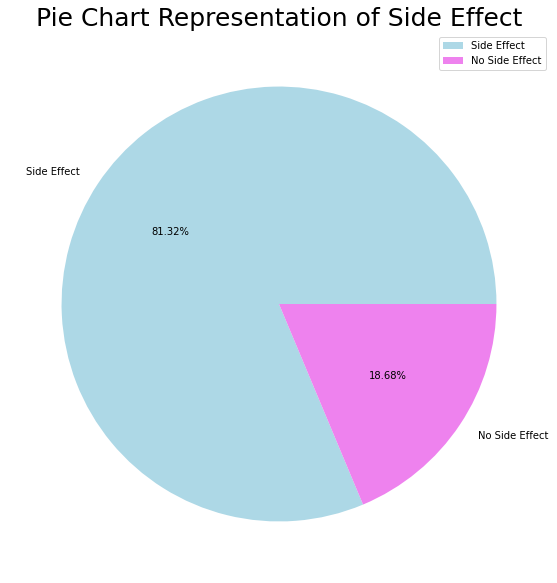

In [9]:
# a pie chart to represent the sentiments of the patients

size = [3360, 772]
colors = ['lightblue', 'violet']
labels = "Side Effect", "No Side Effect"

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Side Effect', fontsize = 25)
plt.legend()
plt.show()

In [10]:
data.head()

,Unnamed: 0,index,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benifit_score,sideeffect_score,comment_score,condition_label,DrugName_label,SideEffect_overall,vaderSentiment
0,0,0,enalapril,4,4,1,management of congestive heart failure,slow progress left ventricular dysfunct overt ...,cough hypotens proteinuria impot renal failur ...,monitor blood pressur weight ass resolut fluid,0.4215,-0.8176,-0.5423,999,176,1,0
1,1,1,ortho-tri-cyclen,1,4,3,birth prevention,although type birth control con pros help cram...,heavi cycl cramp hot flash fatigu long last cy...,hate birth control would not suggest anyon,0.4767,0.3818,-0.5719,291,344,1,1
2,2,2,ponstel,10,4,0,menstrual cramps,use cramp bad would leav ball bed least 2 day ...,heavier bleed clot normal,took 2 pill onset menstrual cramp everi 8 12 h...,-0.8225,0.0000,-0.7717,1024,373,0,0
3,3,3,prilosec,3,1,1,acid reflux,acid reflux went away month day drug heartburn...,constip dri mouth mild dizzi would go away med...,given prilosec prescript dose 45mg per day med...,-0.5267,-0.2960,0.0000,16,382,1,0
4,4,4,lyrica,2,1,3,fibromyalgia,think lyrica start help pain side effect sever...,felt extrem drug dopey could not drive med als...,see,-0.1531,0.0000,0.0000,623,279,1,0


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(data['sideEffectsReview'].values.astype('U'))
labels   = data['vaderSentiment']

In [13]:
data.columns

Index(['Unnamed: 0', 'index', 'DrugName', 'rating', 'effectiveness',
       'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview',
       'commentsReview', 'benifit_score', 'sideeffect_score', 'comment_score',
       'condition_label', 'DrugName_label', 'SideEffect_overall',
       'vaderSentiment'],
      dtype='object')

In [14]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame
columns = ['DrugName_label', 'condition_label', 'rating','effectiveness','vaderSentiment', 'benifit_score', 'comment_score','SideEffect_overall']

In [15]:
data = select_columns(data, columns)

In [16]:
data.head()

,DrugName_label,condition_label,rating,effectiveness,vaderSentiment,benifit_score,comment_score,SideEffect_overall
0,176,999,4,4,0,0.4215,-0.5423,1
1,344,291,1,4,1,0.4767,-0.5719,1
2,373,1024,10,4,0,-0.8225,-0.7717,0
3,382,16,3,1,0,-0.5267,0.0000,1
4,279,623,2,1,0,-0.1531,0.0000,1


In [17]:
features.shape

(4132, 46201)

In [18]:
labels.shape

(4132,)

In [19]:
df1 = pd.DataFrame(features.toarray(), columns = tfidf.get_feature_names())

In [20]:
data = pd.concat([data, df1], axis=1)

In [21]:
data.head()

,DrugName_label,condition_label,rating,effectiveness,vaderSentiment,benifit_score,comment_score,SideEffect_overall,00,00 everi,00 forgot,00 night,000,000 credit,000 cup,000 peopl,000mg,000mg day,00pm,00pm make,025,025 effect,05,07,07 2009,07 condit,07 read,08,08 stop,10,10 000,10 10,10 11,10 12,10 14,10 15,10 16,10 30pm,10 31,10 35,...,zombi,zombi 80mg,zombi aspect,zombi day,zombi extrem,zombi feel,zombi felt,zombi incapl,zombi job,zombi know,zombi like,zombi liter,zombi pass,zombi sleep,zombi slow,zombi stare,zombi thought,zombi time,zombi total,zomig,zomig inabl,zomig rare,zone,zone pass,zyban,zyban care,zyban prescrib,zyban revisit,zyban smoke,zyban took,zyprexa,zyprexa instanc,zyrtec,zyrtec allerg,zyrtec becam,zyrtec dinner,zyrtec dri,zyrtec hair,zyrtec howev,zyrtec mid
0,176,999,4,4,0,0.4215,-0.5423,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,344,291,1,4,1,0.4767,-0.5719,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,373,1024,10,4,0,-0.8225,-0.7717,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,382,16,3,1,0,-0.5267,0.0000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,279,623,2,1,0,-0.1531,0.0000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
features = data.drop(columns = ['SideEffect_overall','benifit_score','comment_score','DrugName_label'], axis = 1)

In [23]:
features.head()

,condition_label,rating,effectiveness,vaderSentiment,00,00 everi,00 forgot,00 night,000,000 credit,000 cup,000 peopl,000mg,000mg day,00pm,00pm make,025,025 effect,05,07,07 2009,07 condit,07 read,08,08 stop,10,10 000,10 10,10 11,10 12,10 14,10 15,10 16,10 30pm,10 31,10 35,10 buck,10 complet,10 day,10 drug,...,zombi,zombi 80mg,zombi aspect,zombi day,zombi extrem,zombi feel,zombi felt,zombi incapl,zombi job,zombi know,zombi like,zombi liter,zombi pass,zombi sleep,zombi slow,zombi stare,zombi thought,zombi time,zombi total,zomig,zomig inabl,zomig rare,zone,zone pass,zyban,zyban care,zyban prescrib,zyban revisit,zyban smoke,zyban took,zyprexa,zyprexa instanc,zyrtec,zyrtec allerg,zyrtec becam,zyrtec dinner,zyrtec dri,zyrtec hair,zyrtec howev,zyrtec mid
0,999,4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,291,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,10,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16,3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,623,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer


In [27]:
normalize = Normalizer()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)

**Logistic Regression**

In [28]:
model_logistics = LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')
model_logistics.fit(x_train, y_train)
y_pred_train = model_logistics.predict(x_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8116


In [29]:
# Test Accuracy for model
y_pred = model_logistics.predict(x_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8180


**Naive Bayes Classifier**

In [30]:
model_NB = MultinomialNB()
model_NB.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
y_pred_train_nb = model_NB.predict(x_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_nb)))

Model accuracy score: 0.8116


In [32]:
# Test Accuracy for model
y_pred = model_NB.predict(x_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8180


**Random Forest Classifier**

In [33]:
model_rfr = RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0)
model_rfr.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
y_pred_train = model_rfr.predict(x_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8116


In [35]:
# Test Accuracy for model
y_pred = model_rfr.predict(x_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8180


**Support Vector Machine**

In [36]:
model_svc = LinearSVC(max_iter=2000, dual=False)
model_svc.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=2000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [37]:
y_pred_train = model_svc.predict(x_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8128


In [38]:
# Test Accuracy for model
y_pred = model_svc.predict(x_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8180


**KNearest Neighbours**

In [39]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
y_pred_train = model_knn.predict(x_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9877


In [41]:
# Test Accuracy for model
y_pred = model_knn.predict(x_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9661


In [42]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[842,   3],
       [ 32, 156]])

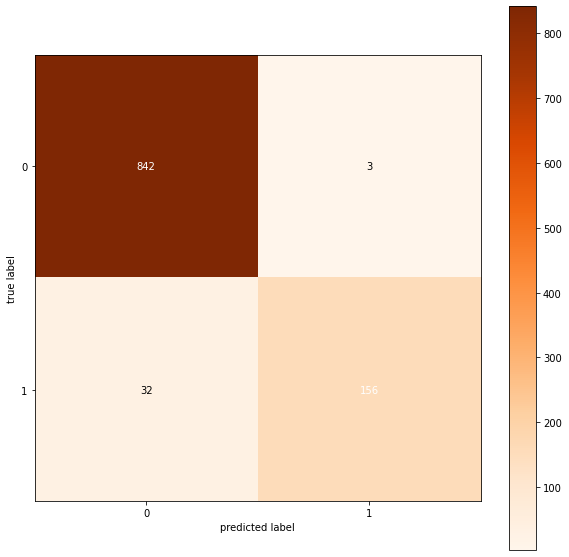

In [43]:
from mlxtend.plotting import plot_confusion_matrix

fig,ax = plot_confusion_matrix(conf_mat=conf_mat,colorbar=True,show_absolute=True,cmap='Oranges')

In [44]:
from sklearn.metrics import classification_report

target_names=list(map(str,data['SideEffect_overall'].unique()))

In [45]:
report = classification_report(y_test,y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       845
           0       0.98      0.83      0.90       188

    accuracy                           0.97      1033
   macro avg       0.97      0.91      0.94      1033
weighted avg       0.97      0.97      0.96      1033



**Hyper Parameter tuning for KNN using GridSearchCV**

In [79]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,15))
weight_options = ["uniform", "distance"]

In [80]:
param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

In [81]:
grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [83]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9741836468810255
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


**Lets build model with best Params for KNN**

In [46]:
model_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [47]:
# Train Accuracy

y_pred_train = model_knn.predict(x_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 1.0000


In [48]:
# Test Accuracy for model
y_pred = model_knn.predict(x_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9806


In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[842,   3],
       [ 17, 171]])

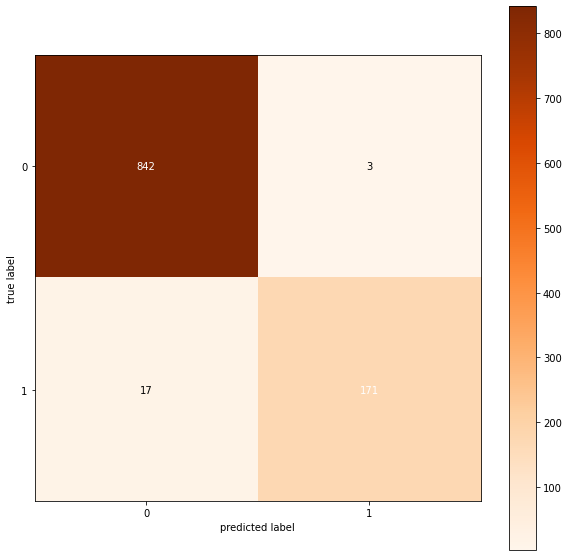

In [50]:
from mlxtend.plotting import plot_confusion_matrix

fig,ax = plot_confusion_matrix(conf_mat=conf_mat,colorbar=True,show_absolute=True,cmap='Oranges')

In [51]:
# Classification Report

from sklearn.metrics import classification_report

target_names=list(map(str,data['SideEffect_overall'].unique()))
report = classification_report(y_test,y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       845
           0       0.98      0.91      0.94       188

    accuracy                           0.98      1033
   macro avg       0.98      0.95      0.97      1033
weighted avg       0.98      0.98      0.98      1033



### Building Model

In [ ]:
models = [KNeighborsClassifier(n_neighbors=3),RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),LinearSVC(),MultinomialNB(),LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto'),XGBClassifier(n_estimators=100)]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
    for fold_idx,accuracy in enumerate(accuracies):
        entries.append((model_name,fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

In [ ]:
cv_df

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig,ax = plot_confusion_matrix(conf_mat=conf_mat,colorbar=True,show_absolute=True,cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

target_names=list(map(str,data['SideEffect_overall'].unique()))

In [ ]:
report = classification_report(y_test,y_pred, target_names=target_names)
print(report)

In [ ]:
# model = LinearSVC('l2')
# x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25,random_state=0)
# normalize = Normalizer()
# x_train = normalize.fit_transform(x_train)
# x_test = normalize.transform(x_test)
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)

In [ ]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))

In [ ]:
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test,y_pred)
# conf_mat

In [ ]:
# from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# fig,ax = plot_confusion_matrix(conf_mat=conf_mat,colorbar=True,show_absolute=True,cmap='viridis')

In [ ]:
# from sklearn.metrics import classification_report

In [ ]:
# target_names=list(map(str,data['Rating_3-classlabel'].unique()))

In [ ]:
# report = classification_report(y_test,y_pred, target_names=target_names)

In [ ]:
# print(report)

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
n_estimators = [int(x) for x in np.linspace(start = 1 , stop = 5, num = 5)] # returns 10 numbers 

In [67]:
max_features = ['auto', 'log2']

In [68]:
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

In [69]:
max_depth.append(None)

In [70]:
bootstrap = [True, False]

In [71]:
r_grid = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'bootstrap': bootstrap}

In [72]:
print(r_grid)

{'n_estimators': [1, 2, 3, 4, 5], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


### Hyperparameter Tuning

In [73]:
rfr_random = RandomizedSearchCV(estimator=model_knn, param_distributions=r_grid,
                                n_iter = 20, cv = 3, verbose=2,
                                random_state=42, n_jobs=-1, return_train_score=True)



In [74]:
rfr_random.fit(x_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: ignored

In [ ]:
print(best_random.score(X_test , y_test))